### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [29]:
## Import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

df = pd.read_csv("../Data/london_bikes.csv") 
df.head()

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
0,2010-07-30T00:00:00Z,6897,2010,Fri,Jul,30,6.0,65.0,10147.0,157.0,22.0,NaN,31.0,17.7,12.3,25.1,False
1,2010-07-31T00:00:00Z,5564,2010,Sat,Jul,30,5.0,70.0,10116.0,184.0,0.0,NaN,47.0,21.1,17.0,23.9,True
2,2010-08-01T00:00:00Z,4303,2010,Sun,Aug,30,7.0,63.0,10132.0,89.0,0.0,NaN,3.0,19.3,14.6,23.4,True
3,2010-08-02T00:00:00Z,6642,2010,Mon,Aug,31,7.0,59.0,10168.0,134.0,0.0,NaN,20.0,19.5,15.6,23.6,False
4,2010-08-03T00:00:00Z,7966,2010,Tue,Aug,31,5.0,66.0,10157.0,169.0,0.0,NaN,39.0,17.9,12.1,20.1,False


**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [30]:
# how many missing values are in each column

df.isnull().sum()

date               0
bikes_hired        0
year               0
wday               0
month              0
week               0
cloud_cover       33
humidity          83
pressure          31
radiation         40
precipitation     31
snow_depth       302
sunshine          31
mean_temp         31
min_temp          62
max_temp          31
weekend            0
dtype: int64

In [31]:
df.dropna(inplace=True)
df

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend
88,2010-10-26T00:00:00Z,13950,2010,Tue,Oct,43,8.0,87.0,10234.0,25.0,40.0,0.0,0.0,8.0,1.9,17.6,False
89,2010-10-27T00:00:00Z,19559,2010,Wed,Oct,43,4.0,84.0,10166.0,68.0,2.0,0.0,38.0,13.4,9.1,15.8,False
90,2010-10-28T00:00:00Z,19995,2010,Thu,Oct,43,5.0,84.0,10149.0,35.0,0.0,0.0,5.0,13.0,10.2,14.8,False
91,2010-10-29T00:00:00Z,19119,2010,Fri,Oct,43,6.0,83.0,10004.0,24.0,26.0,0.0,0.0,13.4,11.9,14.6,False
92,2010-10-30T00:00:00Z,13493,2010,Sat,Oct,43,4.0,85.0,9975.0,76.0,24.0,0.0,53.0,11.7,8.7,12.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2023-12-27T00:00:00Z,6721,2023,Wed,Dec,52,8.0,89.0,10067.0,12.0,46.0,0.0,0.0,8.9,5.5,12.6,False
4899,2023-12-28T00:00:00Z,7956,2023,Thu,Dec,52,7.0,81.0,10051.0,15.0,48.0,0.0,2.0,11.2,9.7,11.9,False
4900,2023-12-29T00:00:00Z,11006,2023,Fri,Dec,52,6.0,78.0,10071.0,20.0,0.0,0.0,7.0,10.6,9.2,12.2,False
4901,2023-12-30T00:00:00Z,8801,2023,Sat,Dec,52,7.0,87.0,10046.0,12.0,56.0,0.0,0.0,8.9,5.6,10.7,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4570 entries, 88 to 4902
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4570 non-null   object 
 1   bikes_hired    4570 non-null   int64  
 2   year           4570 non-null   int64  
 3   wday           4570 non-null   object 
 4   month          4570 non-null   object 
 5   week           4570 non-null   int64  
 6   cloud_cover    4570 non-null   float64
 7   humidity       4570 non-null   float64
 8   pressure       4570 non-null   float64
 9   radiation      4570 non-null   float64
 10  precipitation  4570 non-null   float64
 11  snow_depth     4570 non-null   float64
 12  sunshine       4570 non-null   float64
 13  mean_temp      4570 non-null   float64
 14  min_temp       4570 non-null   float64
 15  max_temp       4570 non-null   float64
 16  weekend        4570 non-null   bool   
dtypes: bool(1), float64(10), int64(3), object(3)
memory usag

In [33]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4570 entries, 88 to 4902
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           4570 non-null   datetime64[ns, UTC]
 1   bikes_hired    4570 non-null   int64              
 2   year           4570 non-null   int64              
 3   wday           4570 non-null   object             
 4   month          4570 non-null   object             
 5   week           4570 non-null   int64              
 6   cloud_cover    4570 non-null   float64            
 7   humidity       4570 non-null   float64            
 8   pressure       4570 non-null   float64            
 9   radiation      4570 non-null   float64            
 10  precipitation  4570 non-null   float64            
 11  snow_depth     4570 non-null   float64            
 12  sunshine       4570 non-null   float64            
 13  mean_temp      4570 non-null   float64            
 

In [34]:
categorical_cols = ['wday', 'month', 'weekend']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [35]:
# month as number
df['month_num'] = df['date'].dt.month

# function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    return None  

# apply the function to create the season column
df['season'] = df['month_num'].apply(get_season)

# convert season to categorical type for efficiency
df['season'] = df['season'].astype('category')

df.head(5)

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,precipitation,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend,month_num,season
88,2010-10-26 00:00:00+00:00,13950,2010,Tue,Oct,43,8.0,87.0,10234.0,25.0,40.0,0.0,0.0,8.0,1.9,17.6,False,10,Autumn
89,2010-10-27 00:00:00+00:00,19559,2010,Wed,Oct,43,4.0,84.0,10166.0,68.0,2.0,0.0,38.0,13.4,9.1,15.8,False,10,Autumn
90,2010-10-28 00:00:00+00:00,19995,2010,Thu,Oct,43,5.0,84.0,10149.0,35.0,0.0,0.0,5.0,13.0,10.2,14.8,False,10,Autumn
91,2010-10-29 00:00:00+00:00,19119,2010,Fri,Oct,43,6.0,83.0,10004.0,24.0,26.0,0.0,0.0,13.4,11.9,14.6,False,10,Autumn
92,2010-10-30 00:00:00+00:00,13493,2010,Sat,Oct,43,4.0,85.0,9975.0,76.0,24.0,0.0,53.0,11.7,8.7,12.5,True,10,Autumn


In [36]:
# numeric columns to convert 
numeric_cols = [
    'bikes_hired', 'year', 'week',
    'cloud_cover', 'humidity', 'pressure', 'radiation',
    'precipitation', 'snow_depth', 'sunshine',
    'mean_temp', 'min_temp', 'max_temp'
]

# convert columns to numeric types
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df[numeric_cols].dtypes

bikes_hired        int64
year               int64
week               int64
cloud_cover      float64
humidity         float64
pressure         float64
radiation        float64
precipitation    float64
snow_depth       float64
sunshine         float64
mean_temp        float64
min_temp         float64
max_temp         float64
dtype: object

**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



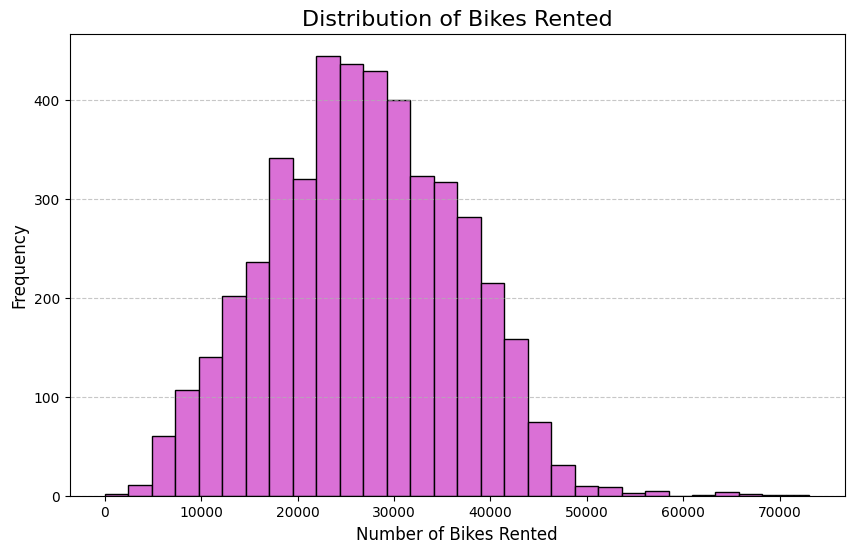

In [37]:
## Your code goes here

# plot histogram of bikes_hired
plt.figure(figsize=(10, 6))
plt.hist(df['bikes_hired'], bins=30, color='orchid', edgecolor='black')

# add title and labels
plt.title('Distribution of Bikes Rented', fontsize=16)
plt.xlabel('Number of Bikes Rented', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# display the plot
plt.show()

/tmp/ipykernel_2250/3530962825.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentals_by_season = df.groupby('season')['bikes_hired'].sum().sort_values()
/tmp/ipykernel_2250/3530962825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rentals_by_season.index, y=rentals_by_season.values, palette='Spectral', edgecolor='black')


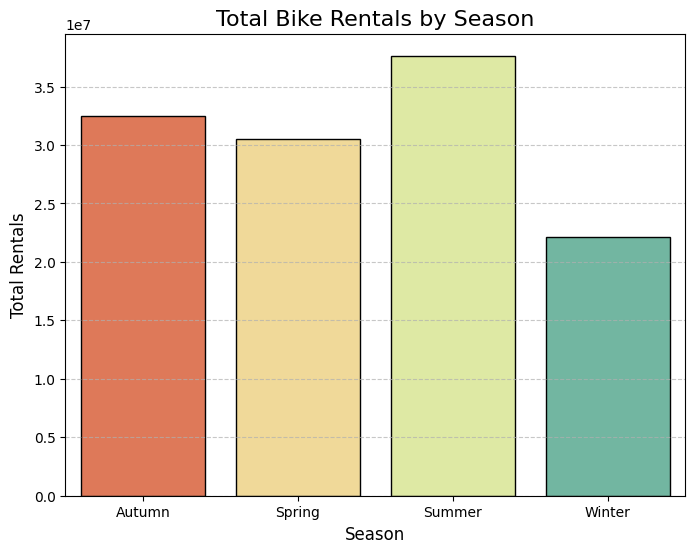

In [38]:
# group by season and calculate total rentals for each season
rentals_by_season = df.groupby('season')['bikes_hired'].sum().sort_values()

# plot
plt.figure(figsize=(8, 6))
sns.barplot(x=rentals_by_season.index, y=rentals_by_season.values, palette='Spectral', edgecolor='black')

# Add title and labels
plt.title('Total Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

In [39]:
import numpy as np
from scipy import stats

# --- season ---
season_stats = df.groupby('season')['bikes_hired'].agg(['mean','count','std'])
season_stats['se'] = season_stats['std'] / np.sqrt(season_stats['count'])
tval = stats.t.ppf(0.975, season_stats['count']-1)
season_stats['ci_low']  = season_stats['mean'] - tval*season_stats['se']
season_stats['ci_high'] = season_stats['mean'] + tval*season_stats['se']

# --- month ---
month_stats = df.groupby('month_num')['bikes_hired'].agg(['mean','count','std'])
month_stats['se'] = month_stats['std'] / np.sqrt(month_stats['count'])
tval_m = stats.t.ppf(0.975, month_stats['count']-1)
month_stats['ci_low']  = month_stats['mean'] - tval_m*month_stats['se']
month_stats['ci_high'] = month_stats['mean'] + tval_m*month_stats['se']



/tmp/ipykernel_2250/1358190112.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = df.groupby('season')['bikes_hired'].agg(['mean','count','std'])


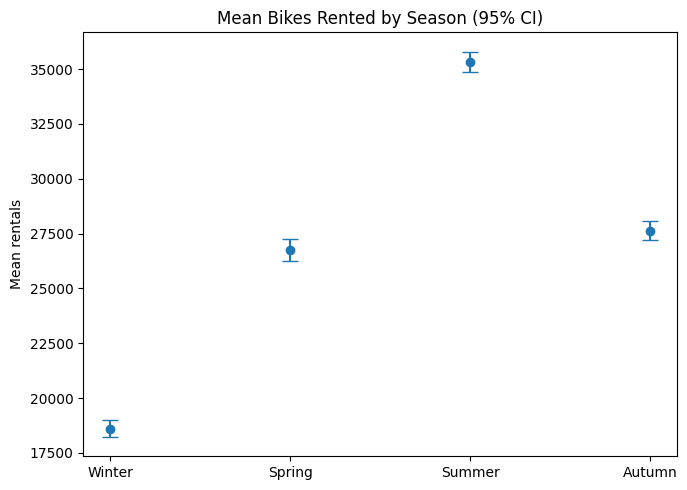

In [40]:
order = ['Winter','Spring','Summer','Autumn']  # or list(season_stats.index)
s = season_stats.loc[order]

plt.figure(figsize=(7,5))
yerr = [s['mean'] - s['ci_low'], s['ci_high'] - s['mean']]
plt.errorbar(range(len(s)), s['mean'], yerr=yerr, fmt='o', capsize=6)
plt.xticks(range(len(s)), s.index)
plt.title('Mean Bikes Rented by Season (95% CI)')
plt.ylabel('Mean rentals')
plt.tight_layout()
plt.show()


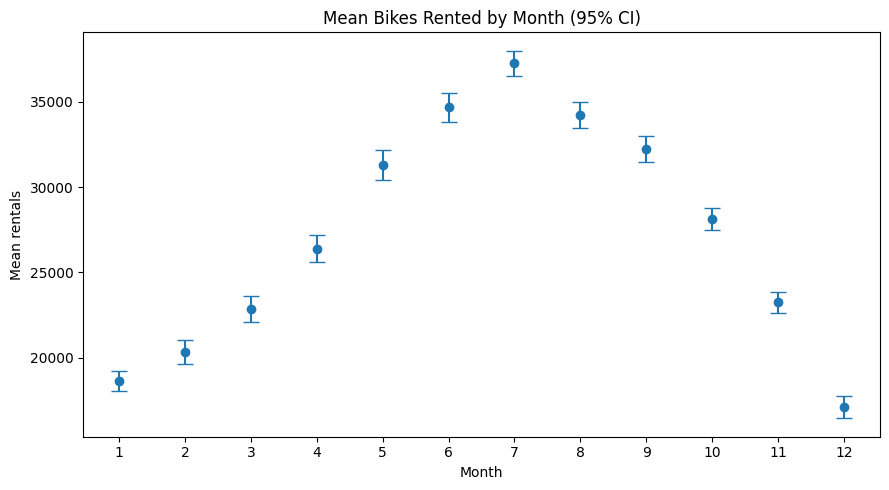

In [41]:
m = month_stats.sort_index()   # months in calendar order

plt.figure(figsize=(9,5))
yerr = [m['mean'] - m['ci_low'], m['ci_high'] - m['mean']]
plt.errorbar(m.index, m['mean'], yerr=yerr, fmt='o', capsize=6)
plt.xticks(m.index)
plt.title('Mean Bikes Rented by Month (95% CI)')
plt.xlabel('Month')
plt.ylabel('Mean rentals')
plt.tight_layout()
plt.show()


A 95% CI means: if we re-sampled many times, 95% of those CIs would cover the true mean.

From the season plot, the ranges are tight (n is large), roughly:
- Winter: ~18.4k–18.9k
- Spring: ~26.4k–27.2k
- Summer: ~35.0k–35.8k
- Autumn: ~27.3k–27.9k
By month (reading the dots): lows around Dec–Jan (~16.5–19k) and highs around Jun–Jul (~35–38k). Each dot’s whiskers give the exact 95% range for that month.

**Which seasons/months have higher vs. lower demand?**

- Highest: Summer (peak around July), then June/August.
- Middle: Autumn ≈ Spring (Autumn a touch higher).
- Lowest: Winter (especially December/January).

**Do intervals overlap? What does that mean?**
- Seasons: CIs are well separated: Summer is clearly above Spring/Autumn, and Winter is clearly below all others. Little/no overlap ⇒ meaningful differences in average demand at the 95% level.
- Months: Most adjacent months also show minimal overlap (e.g., May→Jun→Jul climb and Sep→Oct→Nov decline). That pattern suggests the month-to-month differences are real, not noise.
- General rule of thumb: Non-overlapping 95% CIs strongly indicate different means; overlapping CIs imply the difference is uncertain with this sample (you’d need a formal test to be sure).
- Bottom line: Demand ramps from winter to a summer peak (Jun–Jul), then eases through autumn to a winter trough (Dec–Jan), and your CIs are narrow enough to make those contrasts very clear.

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Minimal model with weather + weekend
model = smf.ols('bikes_hired ~ mean_temp + precipitation + sunshine + C(weekend)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1818.
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:38:05   Log-Likelihood:                -46276.
No. Observations:                4570   AIC:                         9.256e+04
Df Residuals:                    4565   BIC:                         9.259e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.461e+04    220

All the included predictors are statistically significant (p < 0.001):
- C(weekend)[T.True]
- mean_temp
- precipitation
- sunshine
(Intercept is also significant but is mostly a baseline, not very interpretable.)

Holding the other variables constant:
- Weekend (True): −4,212 → on weekends, daily rentals are about 4.2k lower than weekdays (95% CI ≈ −4,600 to −3,824). This suggests demand is largely weekday/commuter-driven in this data.
- Mean temperature: +945 per 1 °C → each extra degree increases rentals by ~945 (95% CI ≈ +912 to +979).
- Precipitation: −41 per unit → each additional unit of precipitation (e.g., mm) reduces rentals by ~41 (95% CI ≈ −46 to −37).
- Sunshine: +72 per unit → each extra unit of sunshine (e.g., hour or index unit) increases rentals by ~72 (95% CI ≈ +67 to +77).

- R² = 0.614 (Adj. R² = 0.614) → the model explains about 61% of the day-to-day variation in bike rentals.

## Deliverables
A knitted HTML, one person per group to submit